In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('CarsData.csv')

In [6]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
75290,Insignia,2019,14995,Manual,31635,Petrol,145,50.4,1.5,vauxhall
81551,Q3,2017,18350,Automatic,31000,Petrol,145,47.9,1.4,Audi
92192,Fiesta,2018,12495,Manual,12810,Petrol,145,56.5,1.0,ford
5750,3 Series,2015,11999,Manual,44379,Diesel,30,61.4,2.0,BMW
21259,Q3,2017,16300,Manual,26951,Petrol,150,51.4,1.4,Audi


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [8]:
df['year'] = 2024 - df['year']

In [9]:
df = df.rename(columns = {'year':'years_old'})

In [10]:
df.head()

,model,years_old,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,7,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,7,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,5,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,7,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,7,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [11]:
df['years_old'] = df['years_old'].astype(int)

In [12]:
df = df.drop_duplicates()

In [13]:
df['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'Other'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le.fit(df['transmission'])
df['transmission'] = le.transform(df['transmission'])

In [17]:
df.head()

,model,years_old,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,7,7495,1,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,7,10989,1,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,5,27990,3,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,7,12495,1,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,7,7999,1,19353,Petrol,125,54.3,1.2,ford


In [18]:
le.fit(df['Manufacturer'])
df['Manufacturer'] = le.transform(df['Manufacturer'])

In [19]:
le.fit(df['fuelType'])
df['fuelType'] = le.transform(df['fuelType'])

In [20]:
le.fit(df['model'])
df['model'] = le.transform(df['model'])

In [21]:
df.head()

,model,years_old,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,81,7,7495,1,11630,4,145,60.1,1.0,3
1,115,7,10989,1,9200,4,145,58.9,1.0,8
2,1,5,27990,3,1614,0,145,49.6,2.0,1
3,184,7,12495,1,30960,0,150,62.8,2.0,5
4,60,7,7999,1,19353,4,125,54.3,1.2,2


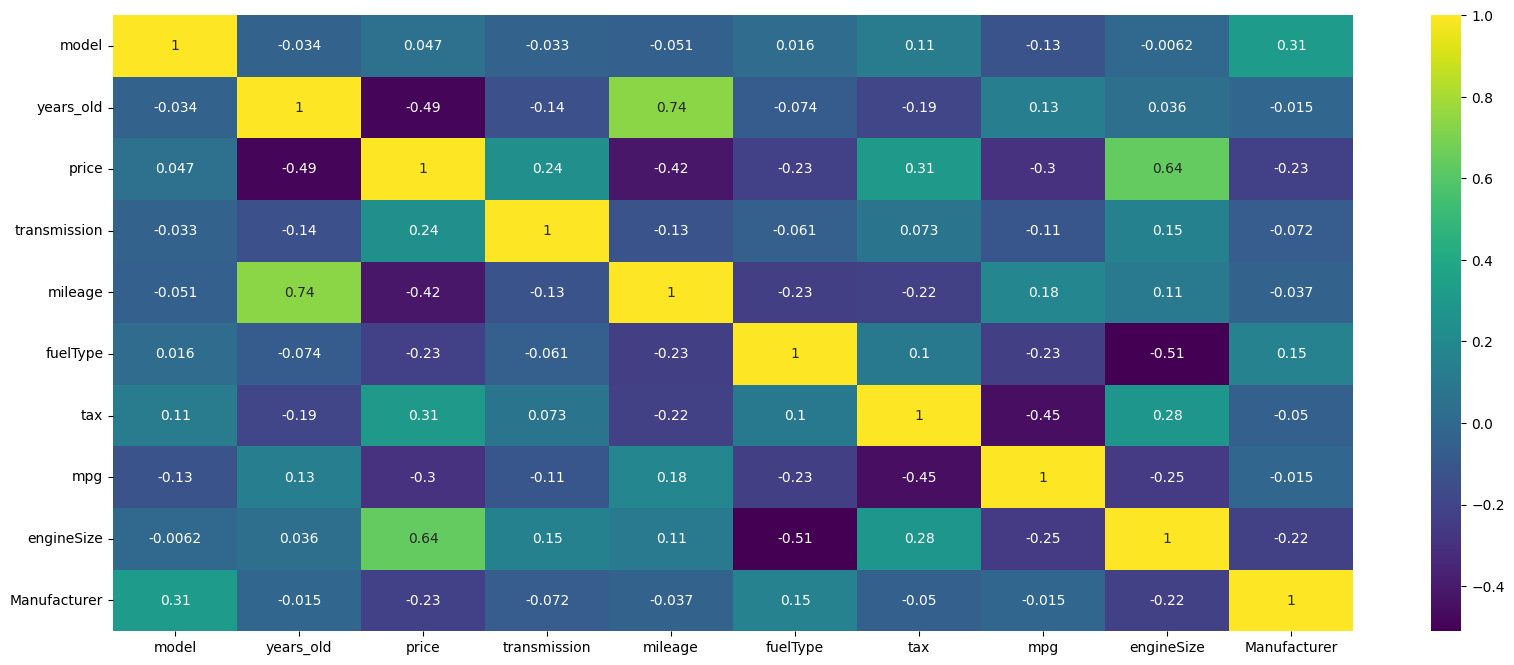

In [22]:
corr_matrix = df.corr()
plt.figure(figsize = (20,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [23]:
df.columns

Index(['model', 'years_old', 'price', 'transmission', 'mileage', 'fuelType',
       'tax', 'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

In [24]:
features = [col for col in df.columns if col not in ['price']]

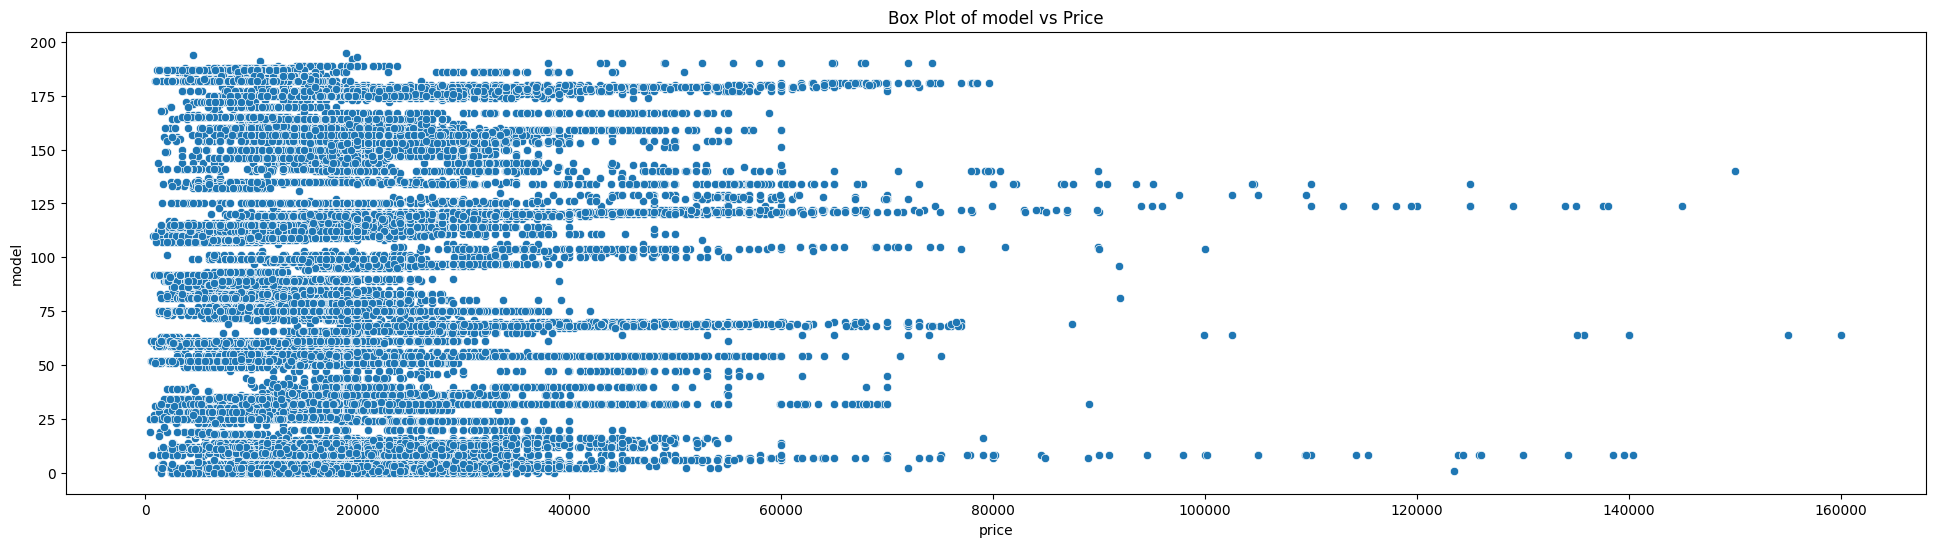

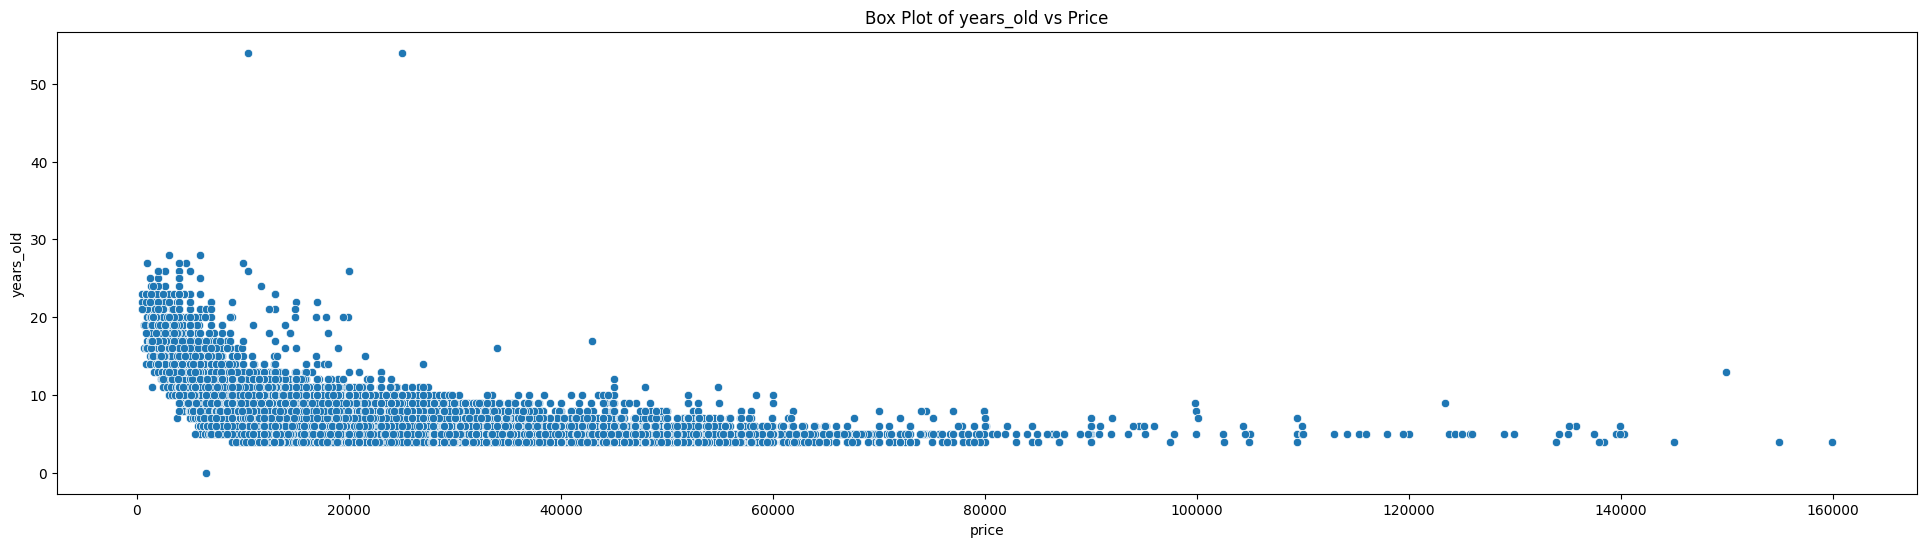

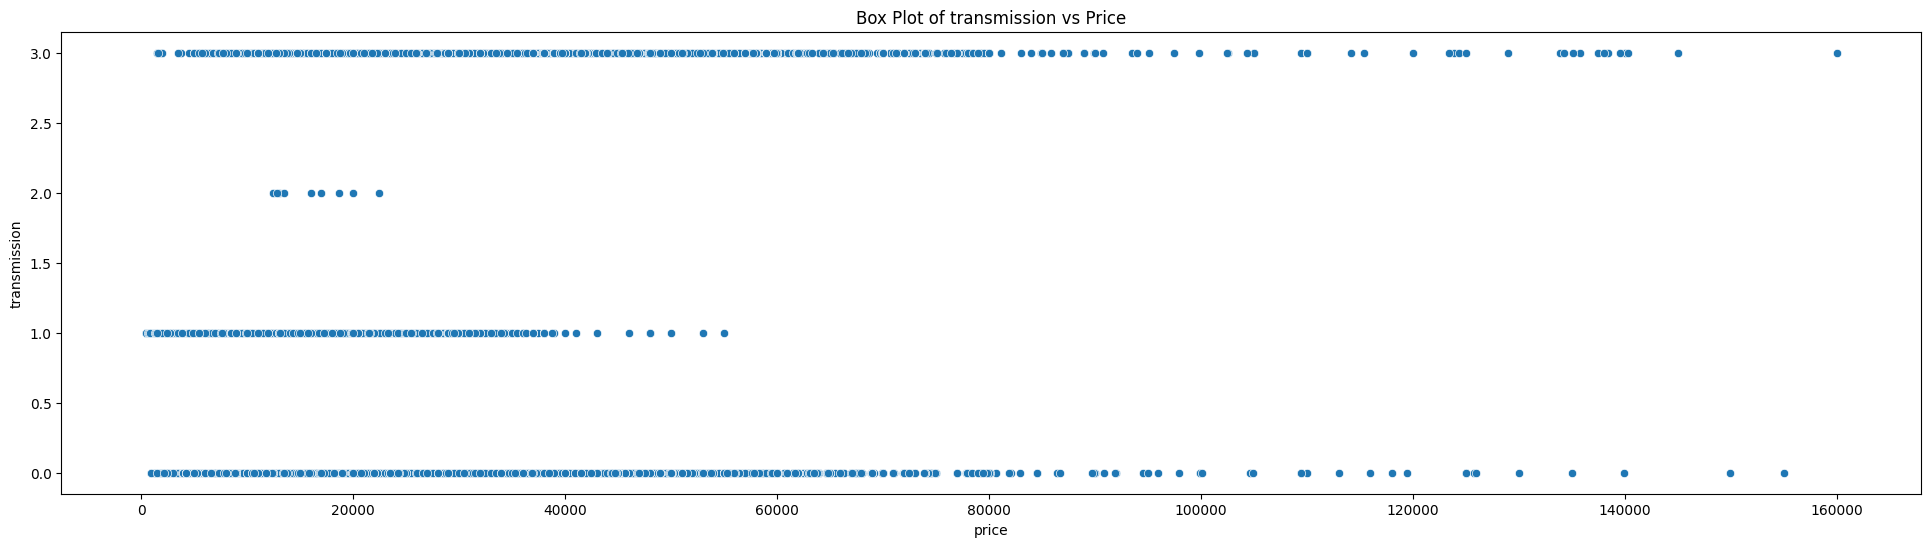

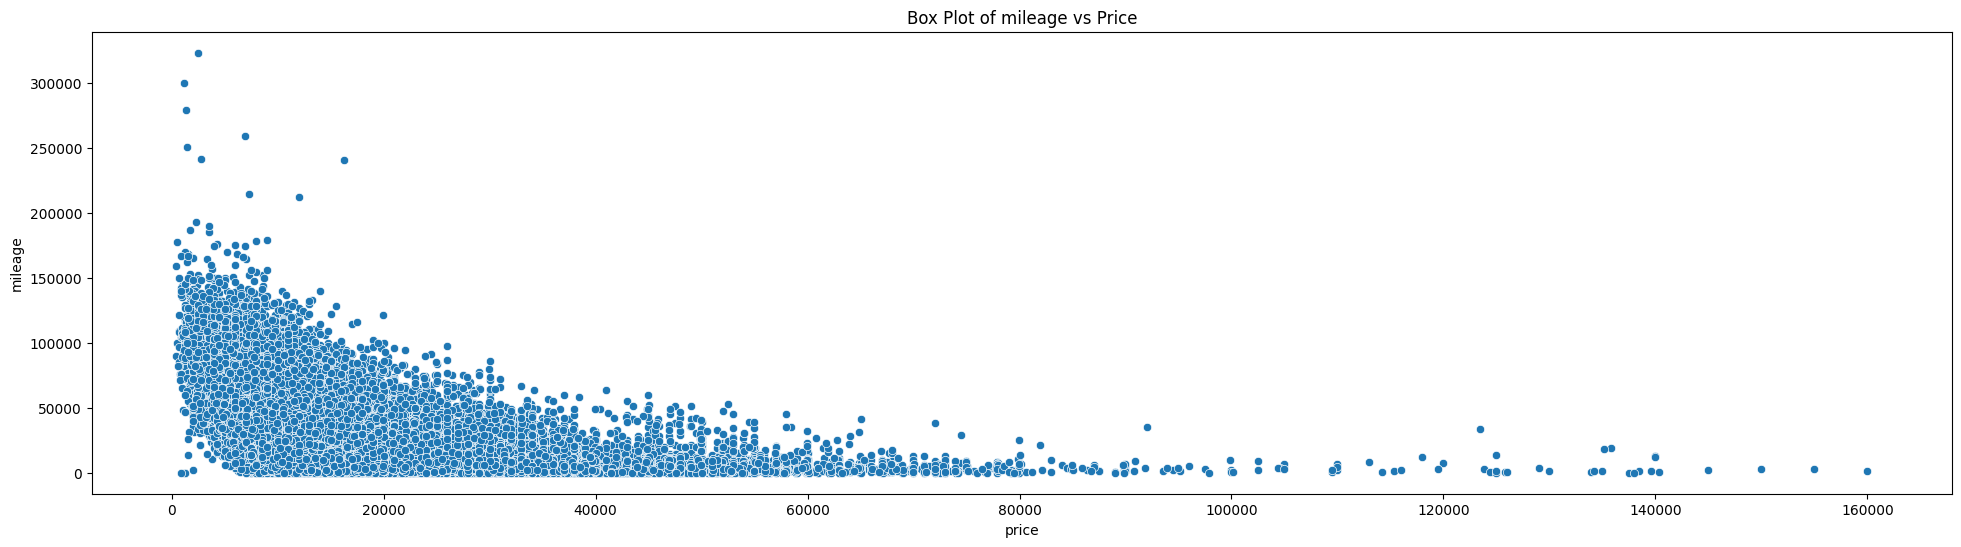

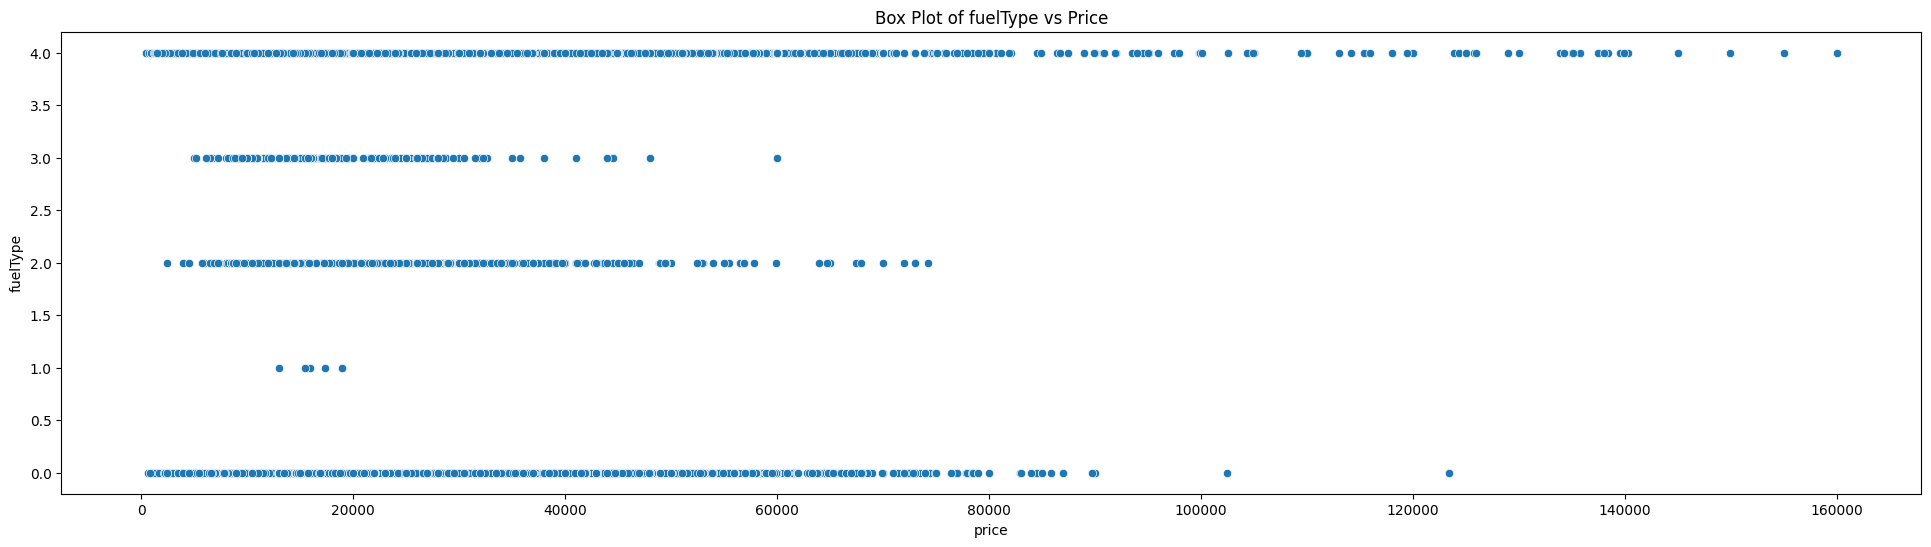

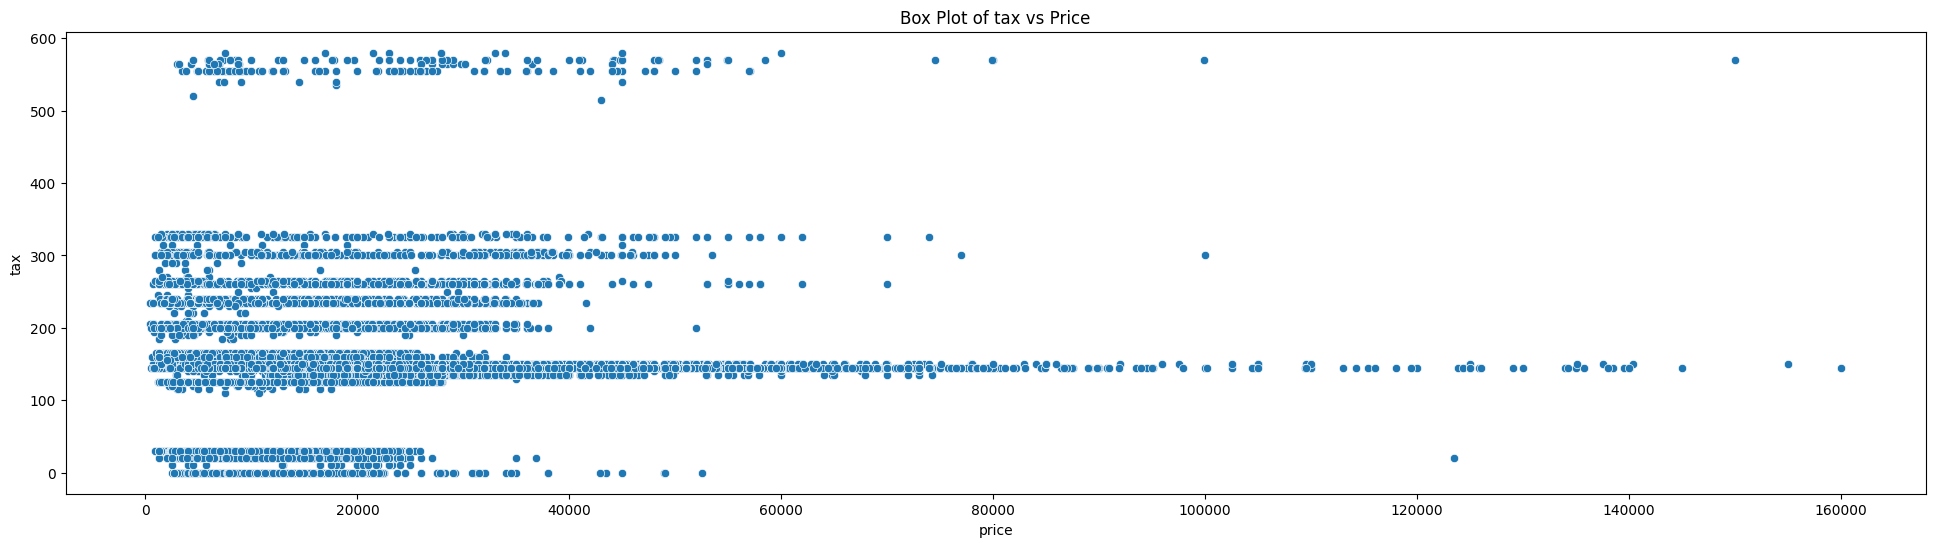

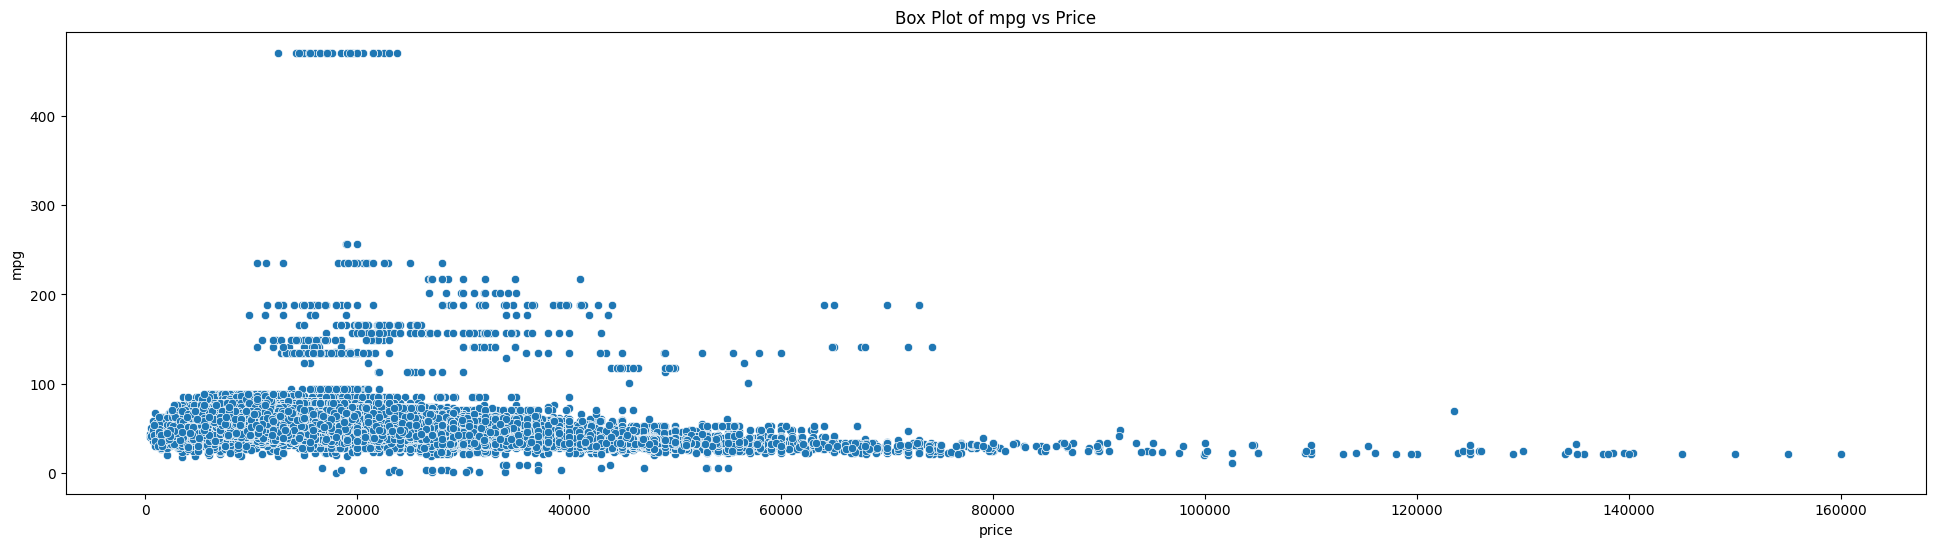

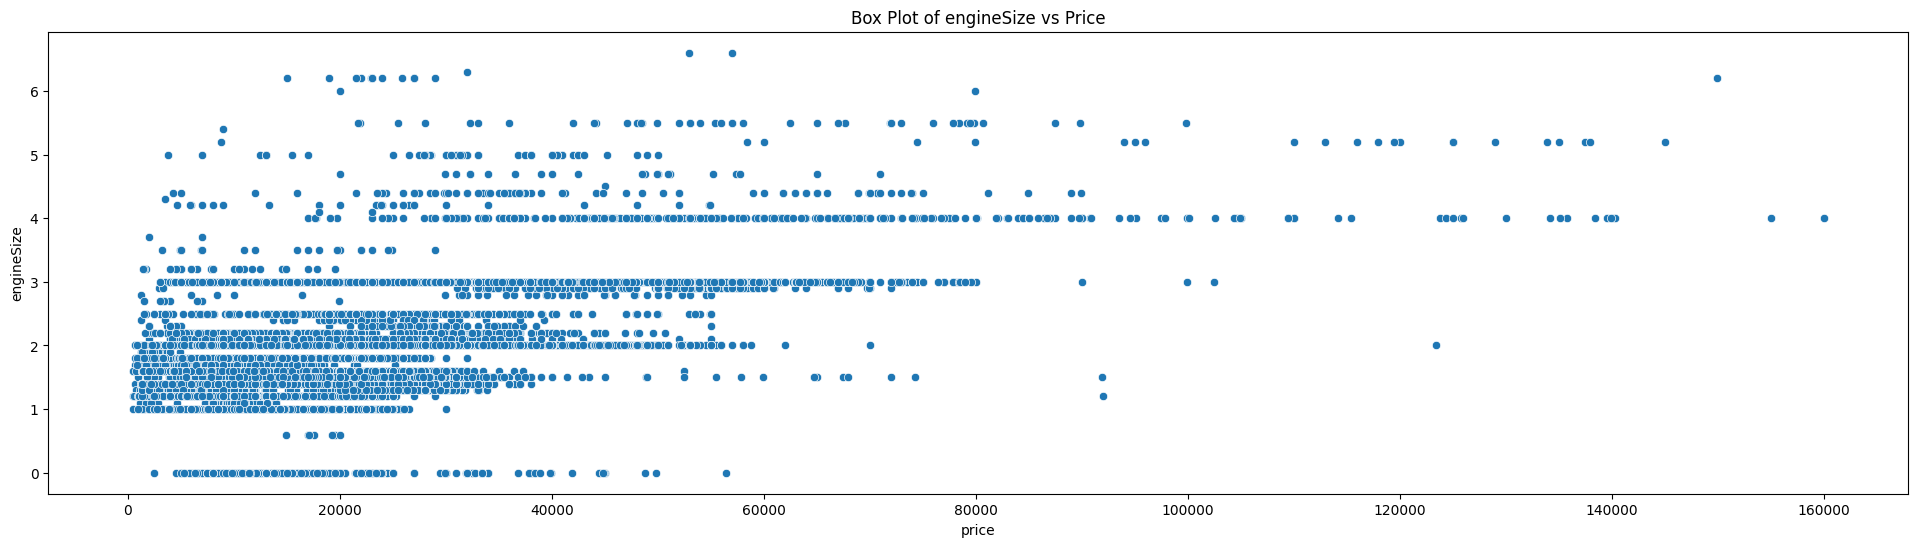

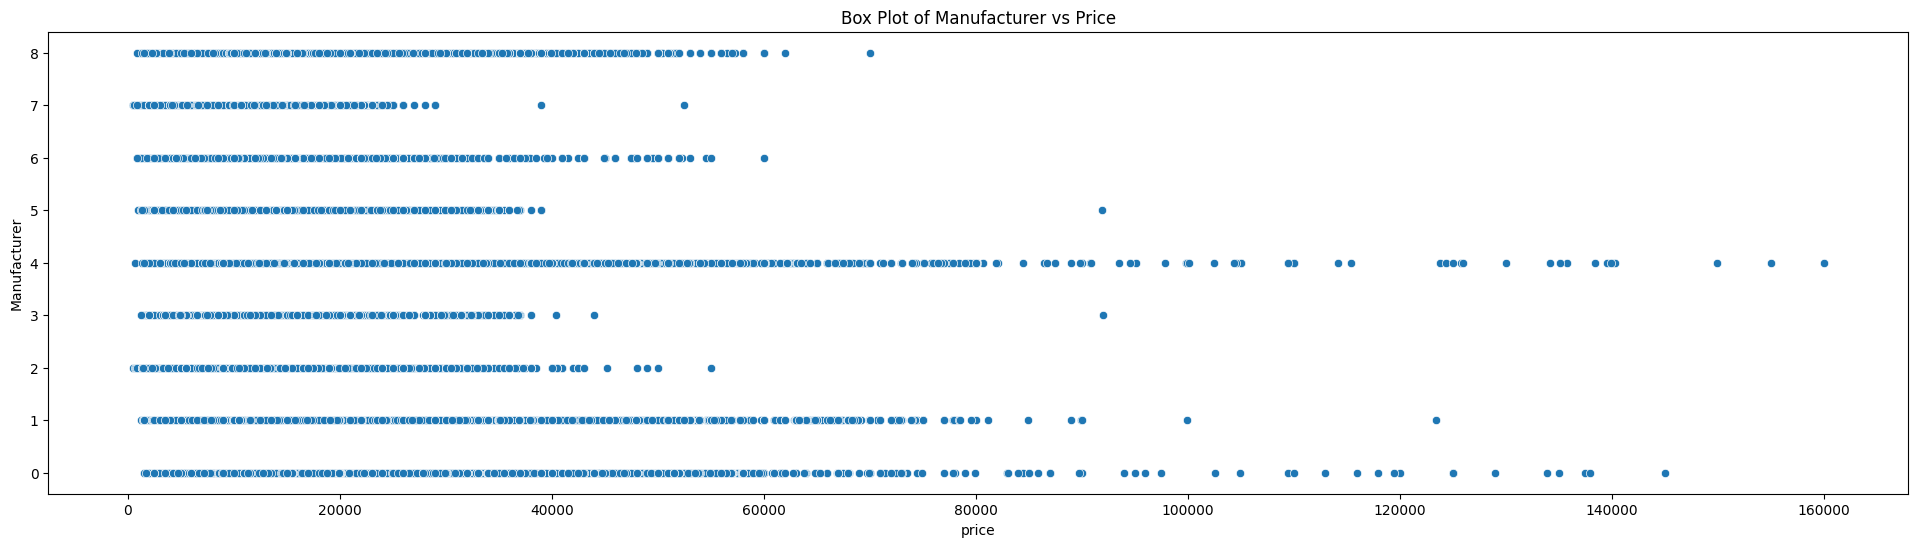

In [25]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.scatterplot(x='price', y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs Price')
    plt.show()

In [26]:
def remove_outliers(df, columns):
  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

df = remove_outliers(df, features)
df.shape

(51990, 10)

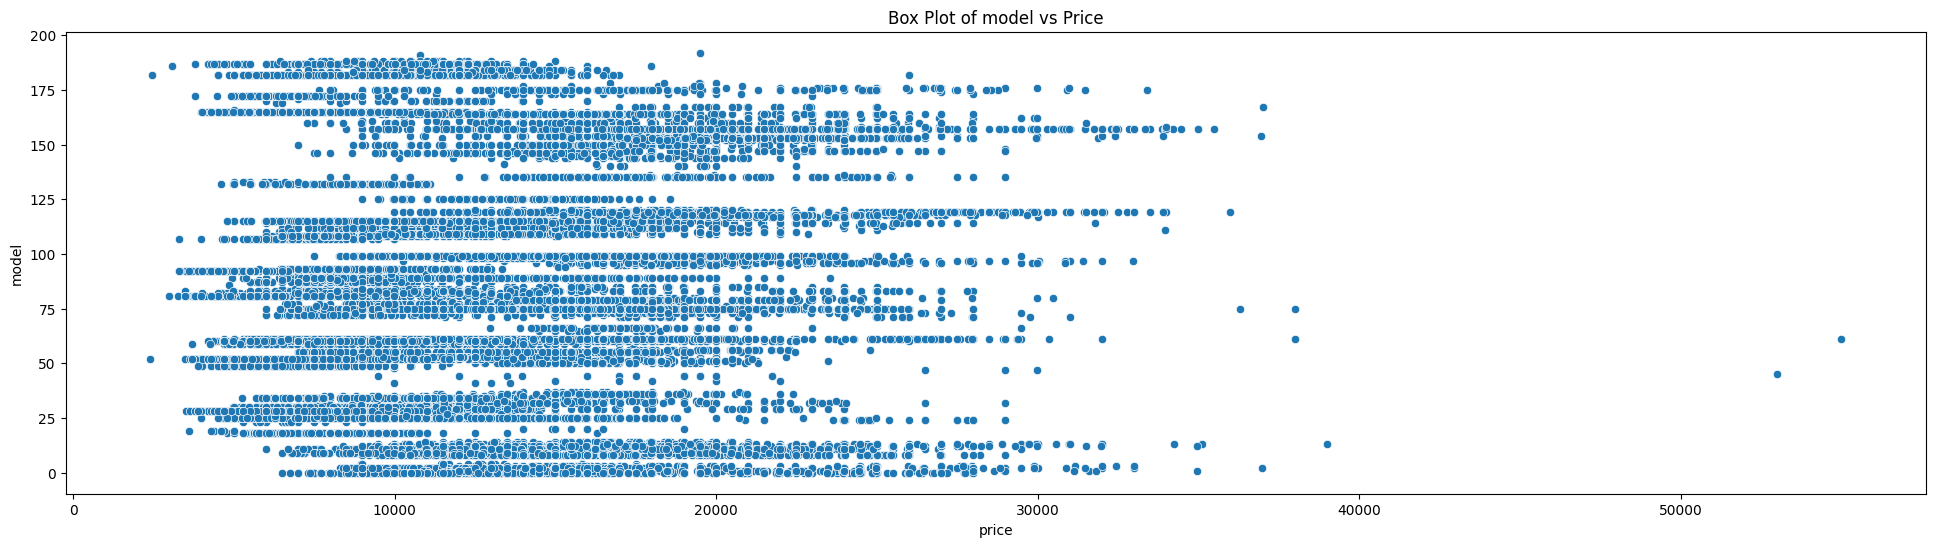

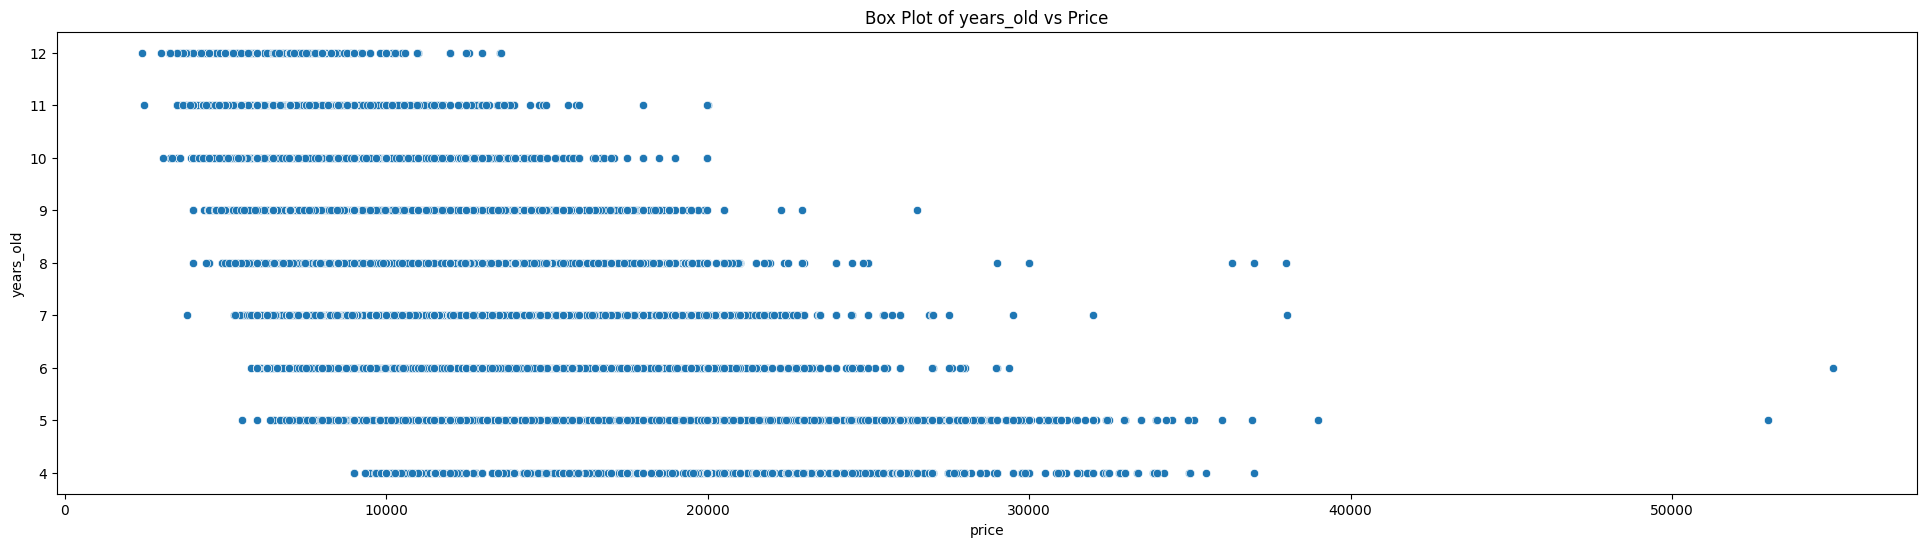

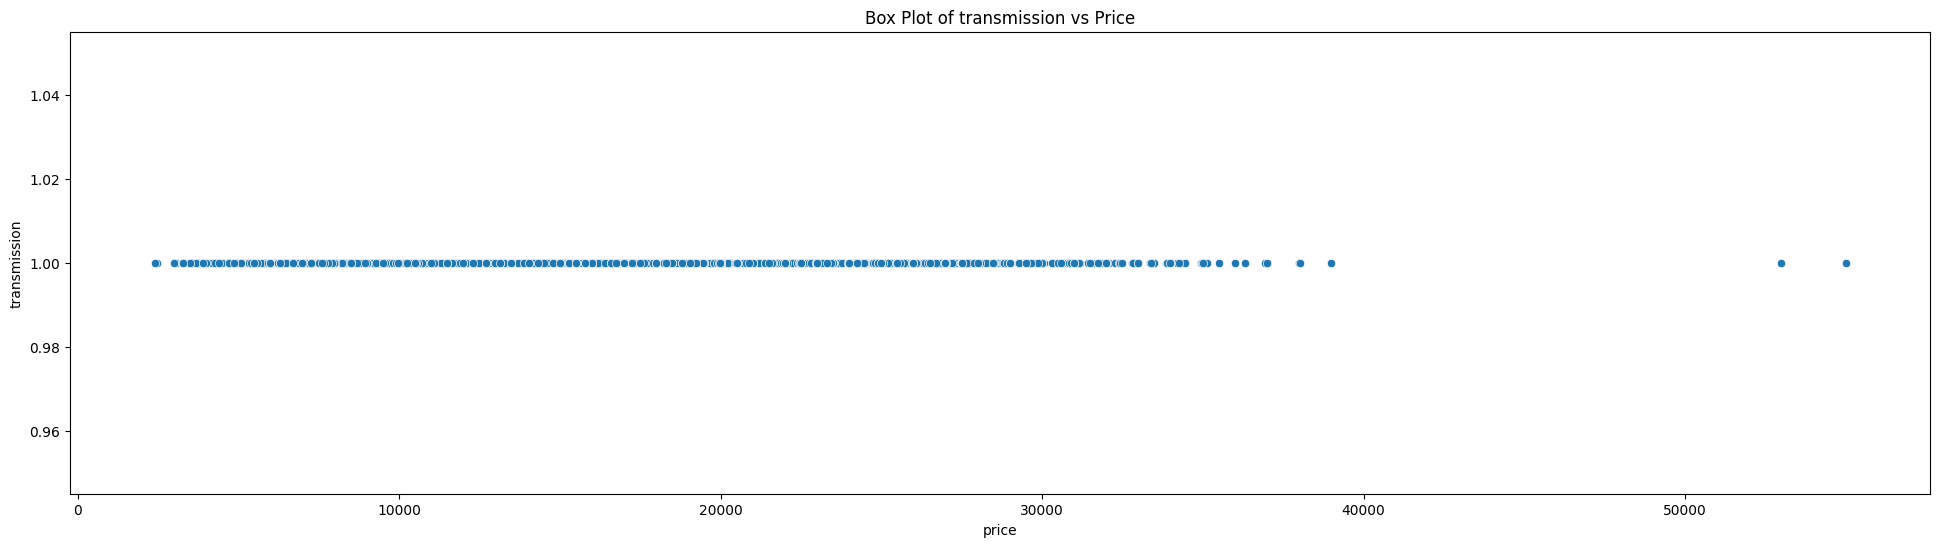

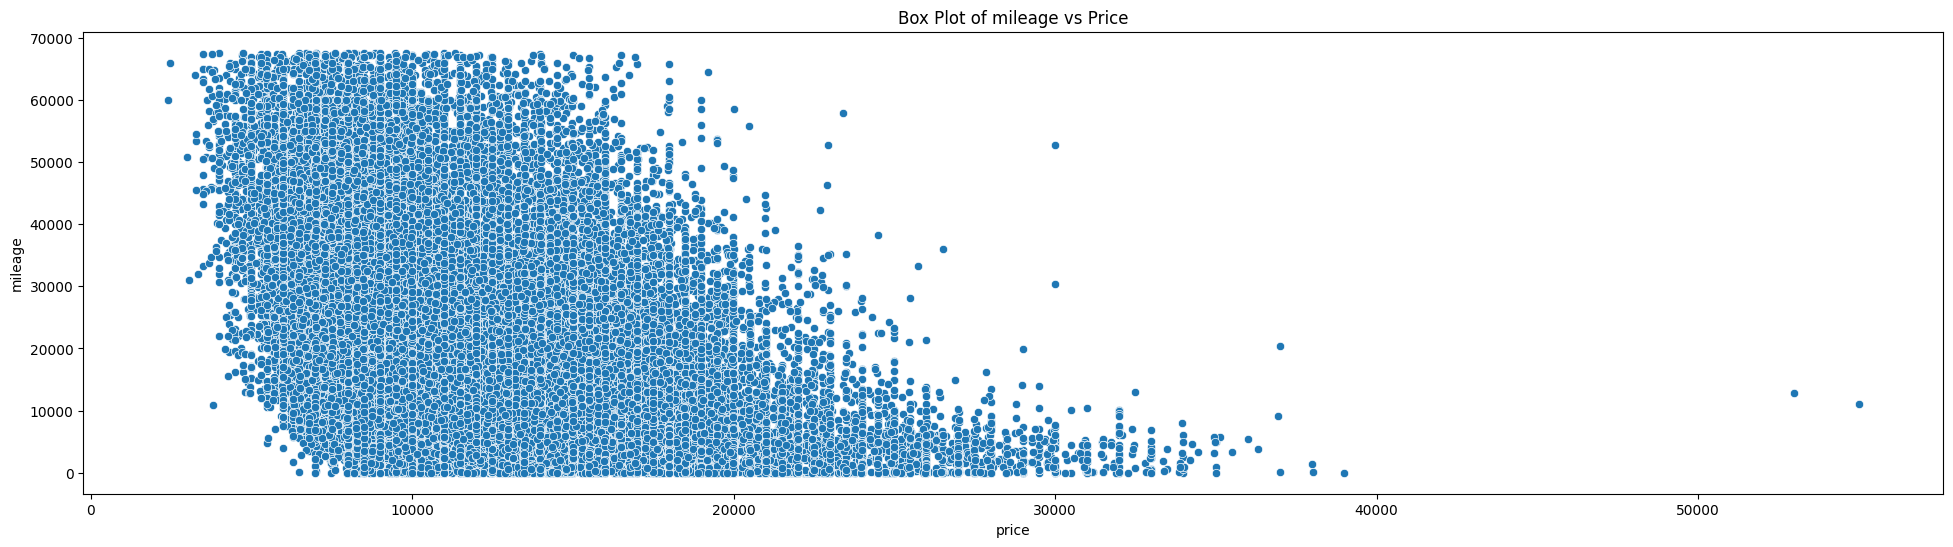

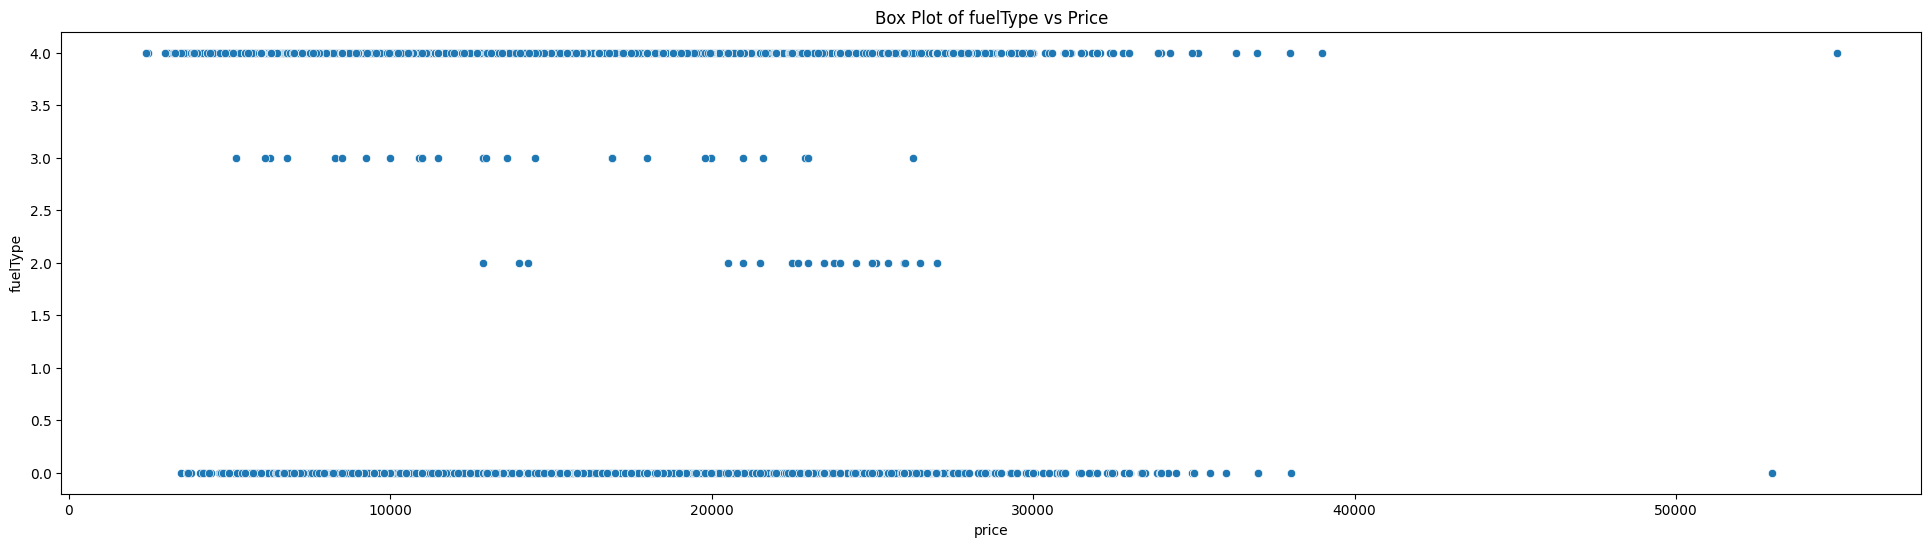

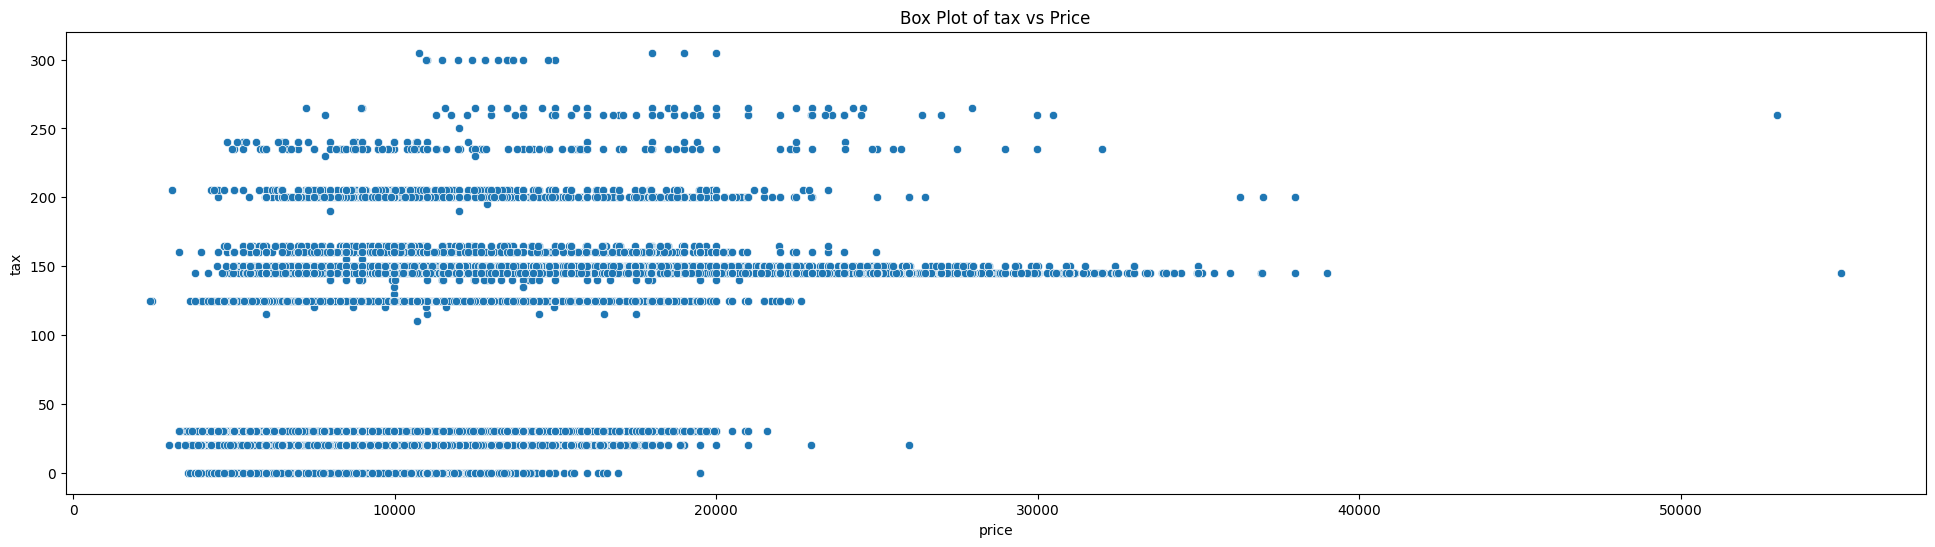

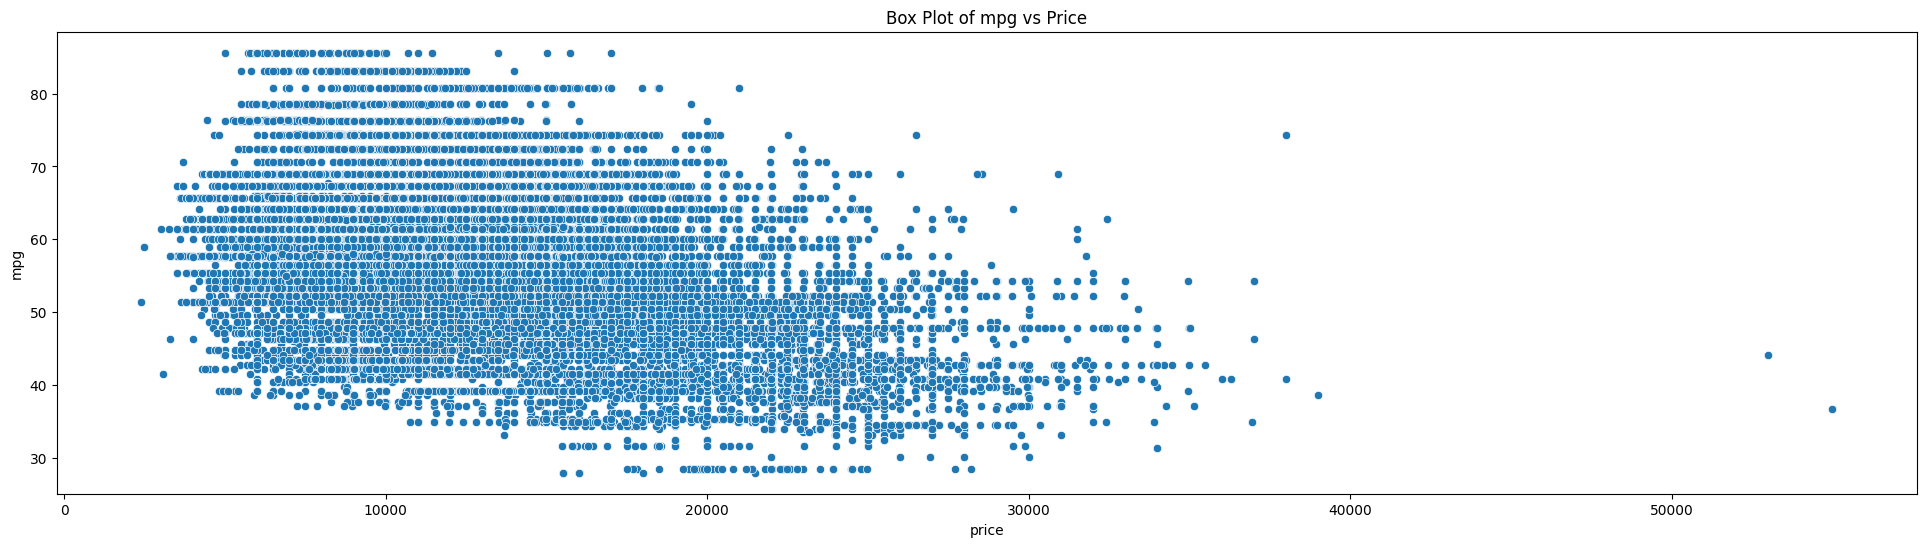

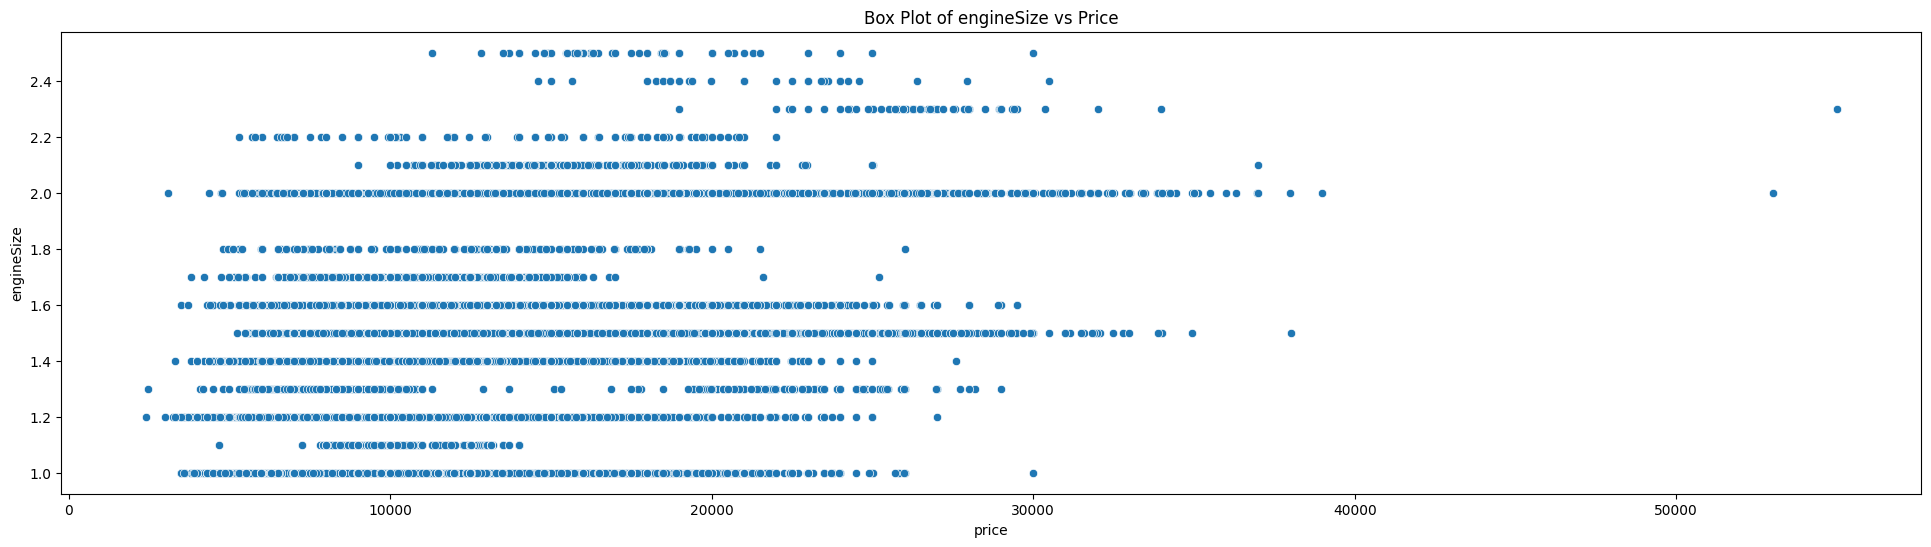

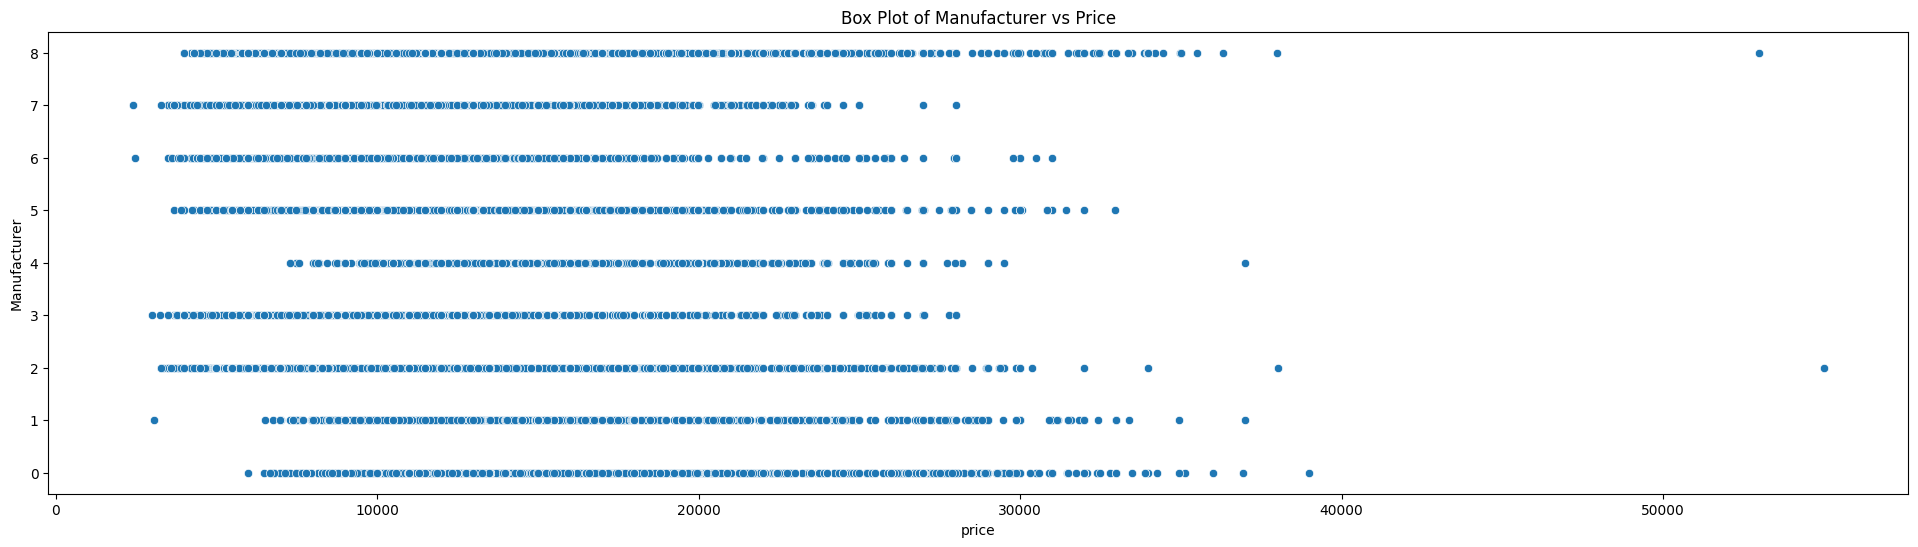

In [27]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.scatterplot(x='price', y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs Price')
    plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns = ['price'])
y = df['price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.exceptions import NotFittedError
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
pipelines = {
    "rf": make_pipeline(RandomForestRegressor(random_state=42)),
    "gb": make_pipeline(GradientBoostingRegressor(random_state=42)),
    "ridge": make_pipeline(Ridge(random_state=42)),
    "lasso": make_pipeline(Lasso(random_state=42)),
    "enet": make_pipeline(ElasticNet(random_state=42)),
    "knn": make_pipeline(StandardScaler(), KNeighborsRegressor())
}

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [34]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2, 5, 10],
        'randomforestregressor__min_samples_leaf': [1, 2, 4],
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'knn': {
        'kneighborsregressor__n_neighbors': [3, 5, 7, 10],
    },
}

In [35]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Searching training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Searching training for rf.
rf has been successfully fit
Searching training for gb.
gb has been successfully fit
Searching training for ridge.
ridge has been successfully fit
Searching training for lasso.
lasso has been successfully fit
Searching training for enet.
enet has been successfully fit
Searching training for knn.
knn has been successfully fit


In [38]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{}, MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9336922056422524, MAE:828.1259697359295
gb scores - R2:0.8686095754856323, MAE:1257.9664104375258
ridge scores - R2:0.6565045148596844, MAE:2131.767087634556
lasso scores - R2:0.6565040591365298, MAE:2131.7734960169655
enet scores - R2:0.6565057142341748, MAE:2131.3556975944475
knn scores - R2:0.9219462311485523, MAE:900.2089440276976
